## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape

(50000, 3072)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer  = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    
    
    return model

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.2784 - accuracy: 0.1513 - val_loss: 2.2432 - val_accuracy: 0.1760
Epoch 2/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.2190 - accuracy: 0.1944 - val_loss: 2.1976 - val_accuracy: 0.1969
Epoch 3/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.1753 - accuracy: 0.2216 - val_loss: 2.1561 - val_accuracy: 0.2287
Epoch 4/500
50000/50000 [==============================] - 6s 124us/step - loss: 2.1352 - accuracy: 0.2420 - val_loss: 2.1182 - val_accuracy: 0.2435
Epoch 5/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0988 - accuracy: 0.2554 - val_loss: 2.0840 - val_accuracy: 0.2606
Epoch 6/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.0662 - accuracy: 0.2666 - val_loss: 2.0528 - val_accuracy: 0.2669
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 6s 124us/step - loss: 1.6688 - accuracy: 0.4118 - val_loss: 1.6749 - val_accuracy: 0.4103
Epoch 56/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.6650 - accuracy: 0.4133 - val_loss: 1.6719 - val_accuracy: 0.4102
Epoch 57/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.6617 - accuracy: 0.4152 - val_loss: 1.6682 - val_accuracy: 0.4106
Epoch 58/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.6578 - accuracy: 0.4173 - val_loss: 1.6642 - val_accuracy: 0.4177
Epoch 59/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.6543 - accuracy: 0.4174 - val_loss: 1.6629 - val_accuracy: 0.4121
Epoch 60/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.6506 - accuracy: 0.4189 - val_loss: 1.6576 - val_accuracy: 0.4162
Epoch 61/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.6469 - accuracy: 0.4198 - val

50000/50000 [==============================] - 6s 126us/step - loss: 1.5150 - accuracy: 0.4677 - val_loss: 1.5530 - val_accuracy: 0.4539
Epoch 110/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.5121 - accuracy: 0.4704 - val_loss: 1.5481 - val_accuracy: 0.4556
Epoch 111/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.5102 - accuracy: 0.4701 - val_loss: 1.5378 - val_accuracy: 0.4566
Epoch 112/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.5076 - accuracy: 0.4699 - val_loss: 1.5387 - val_accuracy: 0.4565
Epoch 113/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.5053 - accuracy: 0.4716 - val_loss: 1.5427 - val_accuracy: 0.4593
Epoch 114/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.5033 - accuracy: 0.4706 - val_loss: 1.5318 - val_accuracy: 0.4604
Epoch 115/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.5004 - accuracy: 0.4736

50000/50000 [==============================] - 6s 126us/step - loss: 1.4030 - accuracy: 0.5051 - val_loss: 1.4878 - val_accuracy: 0.4729
Epoch 164/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.4010 - accuracy: 0.5056 - val_loss: 1.4638 - val_accuracy: 0.4796
Epoch 165/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3989 - accuracy: 0.5079 - val_loss: 1.4614 - val_accuracy: 0.4807
Epoch 166/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3977 - accuracy: 0.5079 - val_loss: 1.4618 - val_accuracy: 0.4812
Epoch 167/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3955 - accuracy: 0.5078 - val_loss: 1.4597 - val_accuracy: 0.4846
Epoch 168/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3946 - accuracy: 0.5070 - val_loss: 1.4634 - val_accuracy: 0.4811
Epoch 169/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3918 - accuracy: 0.5095

50000/50000 [==============================] - 6s 126us/step - loss: 1.3141 - accuracy: 0.5370 - val_loss: 1.4483 - val_accuracy: 0.4787
Epoch 218/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3112 - accuracy: 0.5377 - val_loss: 1.4285 - val_accuracy: 0.4946
Epoch 219/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3092 - accuracy: 0.5405 - val_loss: 1.4172 - val_accuracy: 0.4963
Epoch 220/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3111 - accuracy: 0.5383 - val_loss: 1.4264 - val_accuracy: 0.4925
Epoch 221/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3084 - accuracy: 0.5399 - val_loss: 1.4193 - val_accuracy: 0.4928
Epoch 222/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.3054 - accuracy: 0.5406 - val_loss: 1.4679 - val_accuracy: 0.4796
Epoch 223/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.3039 - accuracy: 0.5400

50000/50000 [==============================] - 6s 125us/step - loss: 1.2357 - accuracy: 0.5668 - val_loss: 1.3985 - val_accuracy: 0.5028
Epoch 272/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2310 - accuracy: 0.5680 - val_loss: 1.3948 - val_accuracy: 0.5011
Epoch 273/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2371 - accuracy: 0.5638 - val_loss: 1.4115 - val_accuracy: 0.4947
Epoch 274/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2333 - accuracy: 0.5670 - val_loss: 1.4670 - val_accuracy: 0.4774
Epoch 275/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.2285 - accuracy: 0.5673 - val_loss: 1.3981 - val_accuracy: 0.4990
Epoch 276/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2276 - accuracy: 0.5681 - val_loss: 1.3837 - val_accuracy: 0.5094
Epoch 277/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.2291 - accuracy: 0.5674

50000/50000 [==============================] - 6s 125us/step - loss: 1.1621 - accuracy: 0.5902 - val_loss: 1.4672 - val_accuracy: 0.4870
Epoch 326/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1623 - accuracy: 0.5893 - val_loss: 1.3721 - val_accuracy: 0.5110
Epoch 327/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.1630 - accuracy: 0.5914 - val_loss: 1.3735 - val_accuracy: 0.5123
Epoch 328/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1612 - accuracy: 0.5918 - val_loss: 1.3694 - val_accuracy: 0.5127
Epoch 329/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1599 - accuracy: 0.5929 - val_loss: 1.4277 - val_accuracy: 0.4959
Epoch 330/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1604 - accuracy: 0.5911 - val_loss: 1.4146 - val_accuracy: 0.5004
Epoch 331/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.1537 - accuracy: 0.5945

50000/50000 [==============================] - 6s 124us/step - loss: 1.0912 - accuracy: 0.6160 - val_loss: 1.3707 - val_accuracy: 0.5182
Epoch 380/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.1007 - accuracy: 0.6111 - val_loss: 1.3529 - val_accuracy: 0.5220
Epoch 381/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0865 - accuracy: 0.6191 - val_loss: 1.3825 - val_accuracy: 0.5123
Epoch 382/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0912 - accuracy: 0.6177 - val_loss: 1.3540 - val_accuracy: 0.5226
Epoch 383/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0932 - accuracy: 0.6164 - val_loss: 1.4312 - val_accuracy: 0.5030
Epoch 384/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0922 - accuracy: 0.6172 - val_loss: 1.3787 - val_accuracy: 0.5115
Epoch 385/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.0883 - accuracy: 0.6153

50000/50000 [==============================] - 6s 125us/step - loss: 1.0253 - accuracy: 0.6379 - val_loss: 1.4587 - val_accuracy: 0.5016
Epoch 434/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0245 - accuracy: 0.6403 - val_loss: 1.3962 - val_accuracy: 0.5152
Epoch 435/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0249 - accuracy: 0.6392 - val_loss: 1.3946 - val_accuracy: 0.5195
Epoch 436/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0278 - accuracy: 0.6386 - val_loss: 1.3854 - val_accuracy: 0.5180
Epoch 437/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.0260 - accuracy: 0.6403 - val_loss: 1.3460 - val_accuracy: 0.5258
Epoch 438/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0259 - accuracy: 0.6380 - val_loss: 1.4179 - val_accuracy: 0.5054
Epoch 439/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0154 - accuracy: 0.6448

50000/50000 [==============================] - 6s 123us/step - loss: 0.9577 - accuracy: 0.6634 - val_loss: 1.3936 - val_accuracy: 0.5205
Epoch 488/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9659 - accuracy: 0.6612 - val_loss: 1.4529 - val_accuracy: 0.5066
Epoch 489/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9531 - accuracy: 0.6644 - val_loss: 1.4554 - val_accuracy: 0.5083
Epoch 490/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9548 - accuracy: 0.6648 - val_loss: 1.3671 - val_accuracy: 0.5269
Epoch 491/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.9573 - accuracy: 0.6637 - val_loss: 1.3623 - val_accuracy: 0.5293
Epoch 492/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9604 - accuracy: 0.6642 - val_loss: 1.3673 - val_accuracy: 0.5282
Epoch 493/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.9538 - accuracy: 0.6659

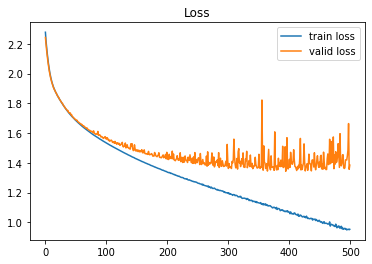

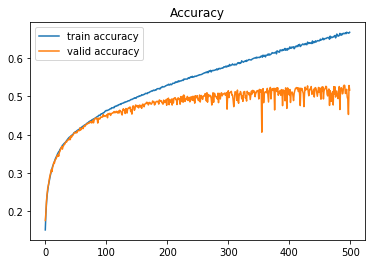

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()